<a href="https://colab.research.google.com/github/maiaracezar/MVP_MAIARACEZAR_DATASET_WINE/blob/main/MVP_MAIARACEZAR_DATASET_WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Maiara Cezar da Silva de Paulo.

**Matrícula:** 4052025001072

**Dataset:** [wine](https://archive.ics.uci.edu/dataset/109/wine)


# Descrição do Problema

O presente projeto tem como objetivo analisar e classificar diferentes tipos de vinho com base em suas características químicas. O conjunto de dados utilizado foi extraído do UCI Machine Learning Repository e contém informações de 178 amostras de vinhos cultivados na região da Itália, cada um pertencente a uma das três classes (tipos de vinho).

Cada amostra possui 13 atributos numéricos que representam medidas químicas como teor alcoólico, acidez, magnésio, fenóis, entre outras.

A partir desses dados, buscamos:
- Entender o perfil químico dos vinhos das diferentes classes;
- Explorar estatisticamente os atributos e identificar quais características mais influenciam na distinção entre os tipos de vinho;
- Criar visualizações que evidenciem os padrões e as diferenças entre os grupos;
- Aplicar um modelo de machine learning supervisionado para prever a classe de um vinho a partir de suas propriedades químicas.

Esta análise pode ser útil para enólogos, distribuidores ou profissionais da indústria de bebidas que desejam automatizar a categorização de vinhos ou compreender melhor os fatores que influenciam a qualidade e o tipo do produto.

## Hipóteses do Problema

A partir da análise dos dados dos vinhos, formulamos as seguintes hipóteses:

1. *As classes de vinho possuem perfis químicos distintos*, sendo possível diferenciá-las por variáveis como teor alcoólico, concentração de fenóis e flavonoides.

2. *Algumas variáveis químicas têm maior poder discriminativo entre os tipos de vinho* do que outras. Por exemplo, espera-se que o teor de álcool e a intensidade da cor sejam determinantes na classificação.

3. *Técnicas de redução de dimensionalidade como PCA* serão eficazes para representar visualmente a separação entre os grupos de vinhos em 2 dimensões.

Essas hipóteses serão testadas ao longo do projeto por meio de análise estatística, visualização de dados e aplicação de algoritmos de classificação.

## Tipo de Problema

Este é um problema de *classificação supervisionada*.

A tarefa consiste em prever a *classe do vinho* (target) com base em suas *características químicas* (variáveis numéricas). Como as classes são conhecidas previamente (fornecidas no dataset), e o objetivo é rotular novas observações, estamos lidando com um problema clássico de aprendizado supervisionado.

Mais especificamente, trata-se de uma *classificação multiclasse, pois existem **três tipos diferentes de vinho* a serem previstos.

Além disso, também realizaremos uma *análise exploratória de dados (EDA)* e aplicação de *redução de dimensionalidade* (PCA) para facilitar a visualização e entender melhor a estrutura dos dados.

## Seleção de Dados
O conjunto de dados utilizado neste projeto é o Wine Dataset, disponibilizado pelo UCI Machine Learning Repository e acessado por meio da biblioteca sklearn.datasets.
Este dataset é muito limpo, pequeno e estruturado. Ele:
	•	Não possui valores nulos
	•	Não tem erros ou duplicatas
	•	Todas as colunas são numéricas
	•	Já vem separado entre atributos e target

## Atributos do Dataset

A base contém *178 registros* e *13 atributos numéricos*, que representam características químicas de amostras de vinho cultivadas na região italiana de mesma origem. Além disso, há uma variável alvo (target) que classifica cada vinho em uma das três categorias (classe 0, 1 ou 2), correspondentes a diferentes cultivares de uva.

Abaixo estão os atributos selecionados para análise:

Atributos do conjunto de dados:

1. *alcohol* — teor alcoólico  
2. *malic_acid* — concentração de ácido málico  
3. *ash* — quantidade de cinzas  
4. *alcalinity_of_ash* — alcalinidade das cinzas  
5. *magnesium* — magnésio  
6. *total_phenols* — fenóis totais  
7. *flavanoids* — flavonoides  
8. *nonflavanoid_phenols* — fenóis não flavonoides  
9. *proanthocyanins* — proantocianinas  
10. *color_intensity* — intensidade da cor  
11. *hue* — matiz  
12. *od280/od315_of_diluted_wines* — relação OD280/OD315 de vinhos diluídos  
13. *proline* — prolina  
14. *target* — classe do vinho (0, 1 ou 2)

Variável-alvo:
- target: classe do vinho (numérica, representando 3 tipos diferentes)

Todos os atributos foram mantidos na análise, pois o objetivo é entender como as variáveis químicas influenciam na classificação dos vinhos. Não foi necessário fazer uma filtragem prévia, pois os dados não possuem valores nulos nem inconsistentes.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Wine.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

# Análise de Dados

Nesta etapa, realizamos uma análise exploratória dos dados (EDA) para entender melhor as características das amostras de vinho, suas distribuições, correlações e a separação entre as classes.

O objetivo é identificar padrões relevantes, outliers e possíveis relações entre as variáveis independentes e a variável-alvo (target), que representa o tipo de vinho (0, 1 ou 2).

*Total e Tipo das Instâncias*
O dataset *Wine*  contém informações químicas de diferentes amostras de vinho, originárias de três cultivares distintas da região da Itália.

- *Total de instâncias (linhas):* 178
- *Total de atributos (colunas):* 13 atributos numéricos + 1 coluna de classe (target)
- *Tipo de instância:* Cada linha representa uma amostra de vinho analisada.
- *Tipo de variável:* Todas as variáveis explicativas são *numéricas contínuas. A variável alvo (target) é **categórica discreta*, representando as 3 classes de vinho (0, 1 e 2).

Classes de vinho no conjunto de dados:
- *Classe 0* – Vinho tipo 1
- *Classe 1* – Vinho tipo 2
- *Classe 2* – Vinho tipo 3

In [22]:
# Total de instâncias e variáveis
print(f'Total de instâncias: {df.shape[0]}')
print(f'Total de atributos (incluindo target): {df.shape[1]}')

# Tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Frequência das classes
print("\nDistribuição das classes (target):")
print(df['target'].value_counts())

Total de instâncias: 178
Total de atributos (incluindo target): 14

Tipos de dados:
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

Distribuição das classes (target):
target
1    71
0    59
2    48
Name: count, dtype: int64


<ipython-input-23-617904181>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


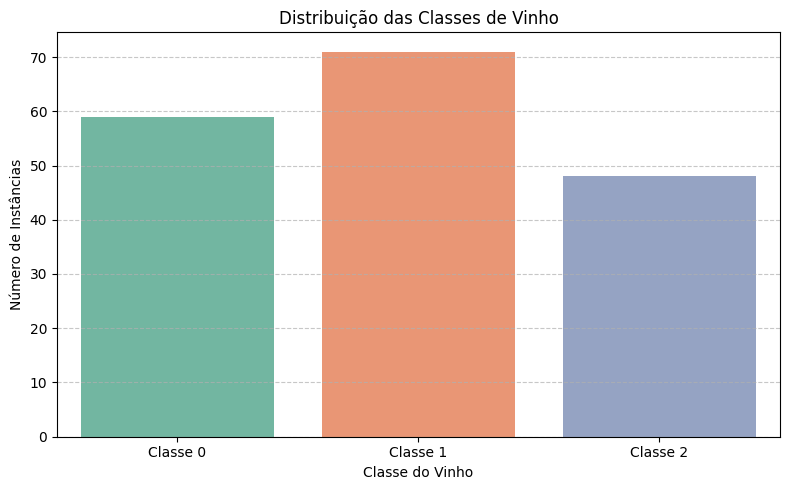

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Distribuição das Classes de Vinho')
plt.xlabel('Classe do Vinho')
plt.ylabel('Número de Instâncias')
plt.xticks(ticks=[0, 1, 2], labels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O gráfico acima mostra como as 178 amostras de vinho estão distribuídas entre as três classes.

- A *Classe 1* possui o maior número de instâncias.
- A *Classe 2* é a menos representada.

Essa distribuição ligeiramente desequilibrada pode influenciar a performance de modelos supervisionados, especialmente em métricas como recall e F1-score.

##Estatísticas Descritivas
Esse comando retorna média, desvio padrão, mínimo, percentis (25%, 50%, 75%) e o valor máximo para cada coluna numérica

In [24]:
# Estatística descritiva
df.describe().T  # Transposto para facilitar a leitura

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


##Boxplots para visualizar a distribuição
Abaixo estão as principais medidas estatísticas (mínimo, máximo, média, mediana e quartis) para cada uma das variáveis numéricas do dataset.

Essas estatísticas ajudam a entender a distribuição, amplitude e variabilidade dos dados.

Além disso, o boxplot permite identificar:
- A dispersão dos dados;
- Diferenças de escala entre variáveis;
- A presença de outliers (valores discrepantes), que podem influenciar os modelos estatísticos e de machine learning.

As variáveis proline, flavanoids e color_intensity apresentam grande variabilidade, indicando maior impacto potencial na separação entre as classes.

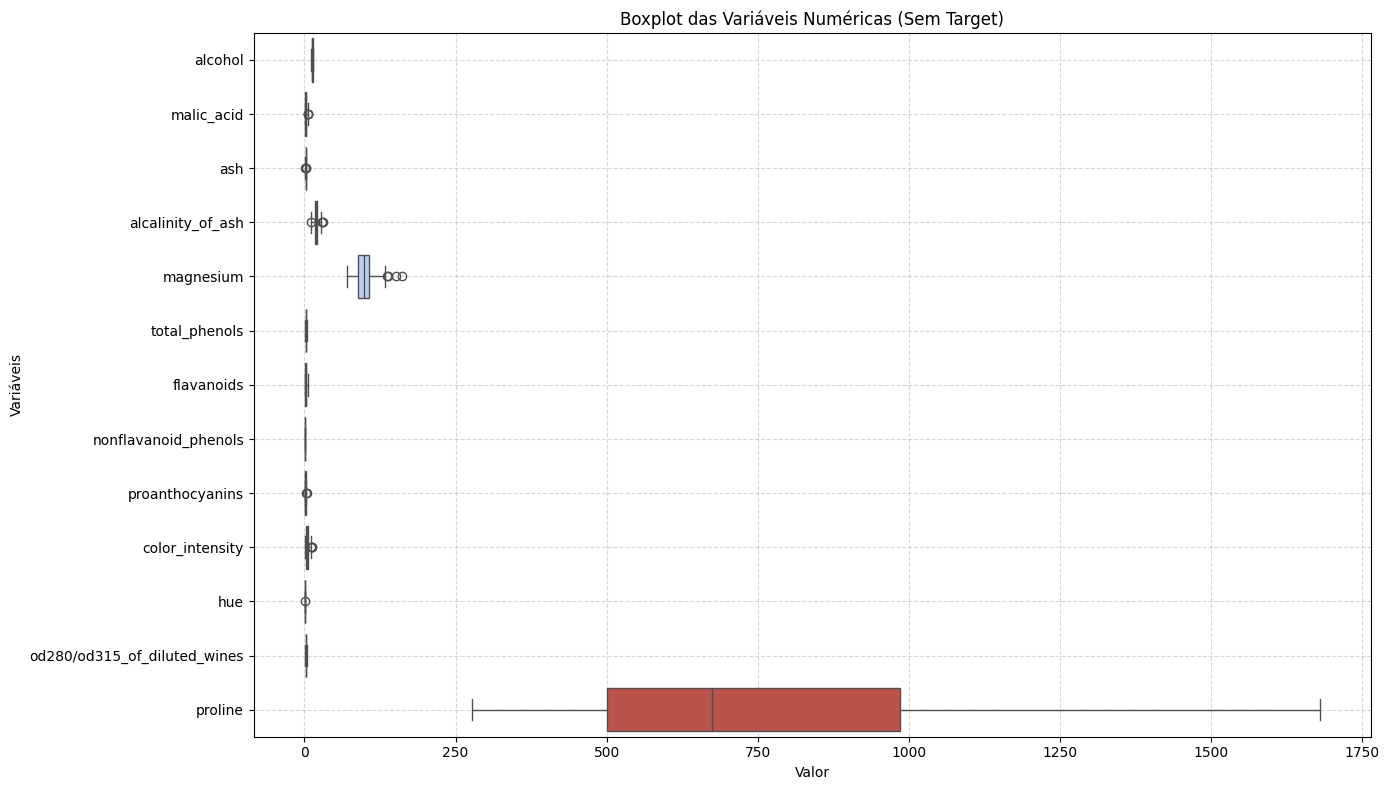

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.drop(columns='target'), orient='h', palette='coolwarm')
plt.title('Boxplot das Variáveis Numéricas (Sem Target)')
plt.xlabel('Valor')
plt.ylabel('Variáveis')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##Média

A média é uma medida de tendência central que nos ajuda a entender o valor típico de cada variável. No dataset Wine, variáveis como proline, flavanoids e alcohol apresentam médias mais altas em comparação às demais.

É importante observar que, devido à diferença de escala entre variáveis, a média por si só não define a importância estatística — mas ajuda a guiar análises mais profundas, como normalização e padronização.

In [27]:
# Cálculo da média das variáveis numéricas
media_variaveis = df.drop(columns='target').mean()
media_variaveis

,0
alcohol,13.000618
malic_acid,2.336348
ash,2.366517
alcalinity_of_ash,19.494944
magnesium,99.741573
total_phenols,2.295112
flavanoids,2.029270
nonflavanoid_phenols,0.361854
proanthocyanins,1.590899
color_intensity,5.058090


In [28]:
# Exibindo como DataFrame ordenado
media_variaveis_df = media_variaveis.sort_values(ascending=False).to_frame(name='Média')
media_variaveis_df

,Média
proline,746.893258
magnesium,99.741573
alcalinity_of_ash,19.494944
alcohol,13.000618
color_intensity,5.058090
od280/od315_of_diluted_wines,2.611685
ash,2.366517
malic_acid,2.336348
total_phenols,2.295112
flavanoids,2.029270


<ipython-input-29-2936664402>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='alcohol', palette='Set2')


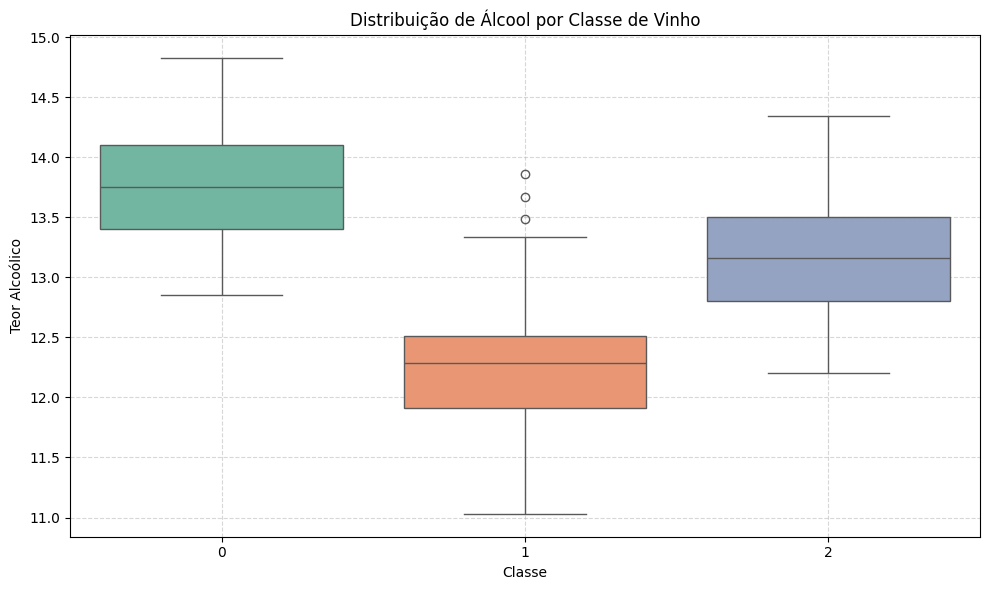

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='alcohol', palette='Set2')
plt.title('Distribuição de Álcool por Classe de Vinho')
plt.xlabel('Classe')
plt.ylabel('Teor Alcoólico')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##Desvio Padrão
O desvio padrão mostra o grau de dispersão dos valores em relação à média. É uma métrica importante para entender a variabilidade dos dados:

- Variáveis com alto desvio padrão, como proline e color_intensity, apresentam maior variação entre as amostras.
- Variáveis com baixo desvio padrão, como magnesium e nonflavanoid_phenols, indicam dados mais homogêneos.

Essa informação é essencial para decisões como normalização ou padronização antes de aplicar algoritmos de machine learning.

In [30]:
# Cálculo do desvio padrão
desvio_padrao = df.drop(columns='target').std()
desvio_padrao

,0
alcohol,0.811827
malic_acid,1.117146
ash,0.274344
alcalinity_of_ash,3.339564
magnesium,14.282484
total_phenols,0.625851
flavanoids,0.998859
nonflavanoid_phenols,0.124453
proanthocyanins,0.572359
color_intensity,2.318286


In [31]:
# Como DataFrame ordenado
desvio_padrao_df = desvio_padrao.sort_values(ascending=False).to_frame(name='Desvio Padrão')
desvio_padrao_df

,Desvio Padrão
proline,314.907474
magnesium,14.282484
alcalinity_of_ash,3.339564
color_intensity,2.318286
malic_acid,1.117146
flavanoids,0.998859
alcohol,0.811827
od280/od315_of_diluted_wines,0.709990
total_phenols,0.625851
proanthocyanins,0.572359


<ipython-input-32-2528156924>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desvio_padrao.values, y=desvio_padrao.index, palette='magma')


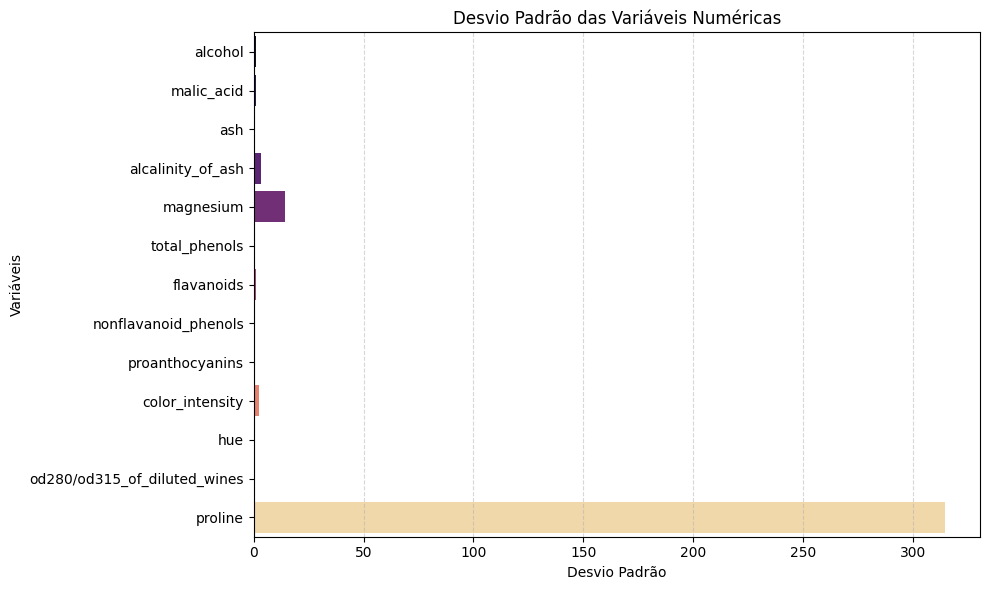

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=desvio_padrao.values, y=desvio_padrao.index, palette='magma')
plt.title('Desvio Padrão das Variáveis Numéricas')
plt.xlabel('Desvio Padrão')
plt.ylabel('Variáveis')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##Histograma segmentado por classe

Abaixo estão os histogramas de cada variável química do vinho, segmentados por classe (target). Essa análise permite:

- Observar o *perfil químico típico* de cada tipo de vinho;
- Identificar variáveis com *distribuições distintas entre as classes*, que podem ser fortes candidatas a preditores em modelos supervisionados;
- Explorar visualmente possíveis *correlações* e padrões.

Exemplos:
- A variável flavanoids apresenta clara separação entre as classes, o que sugere forte poder discriminativo.
- proline e color_intensity também mostram variações significativas entre os grupos.

Essas observações apoiam a próxima etapa, que é a *modelagem supervisionada* para previsão da classe do vinho.


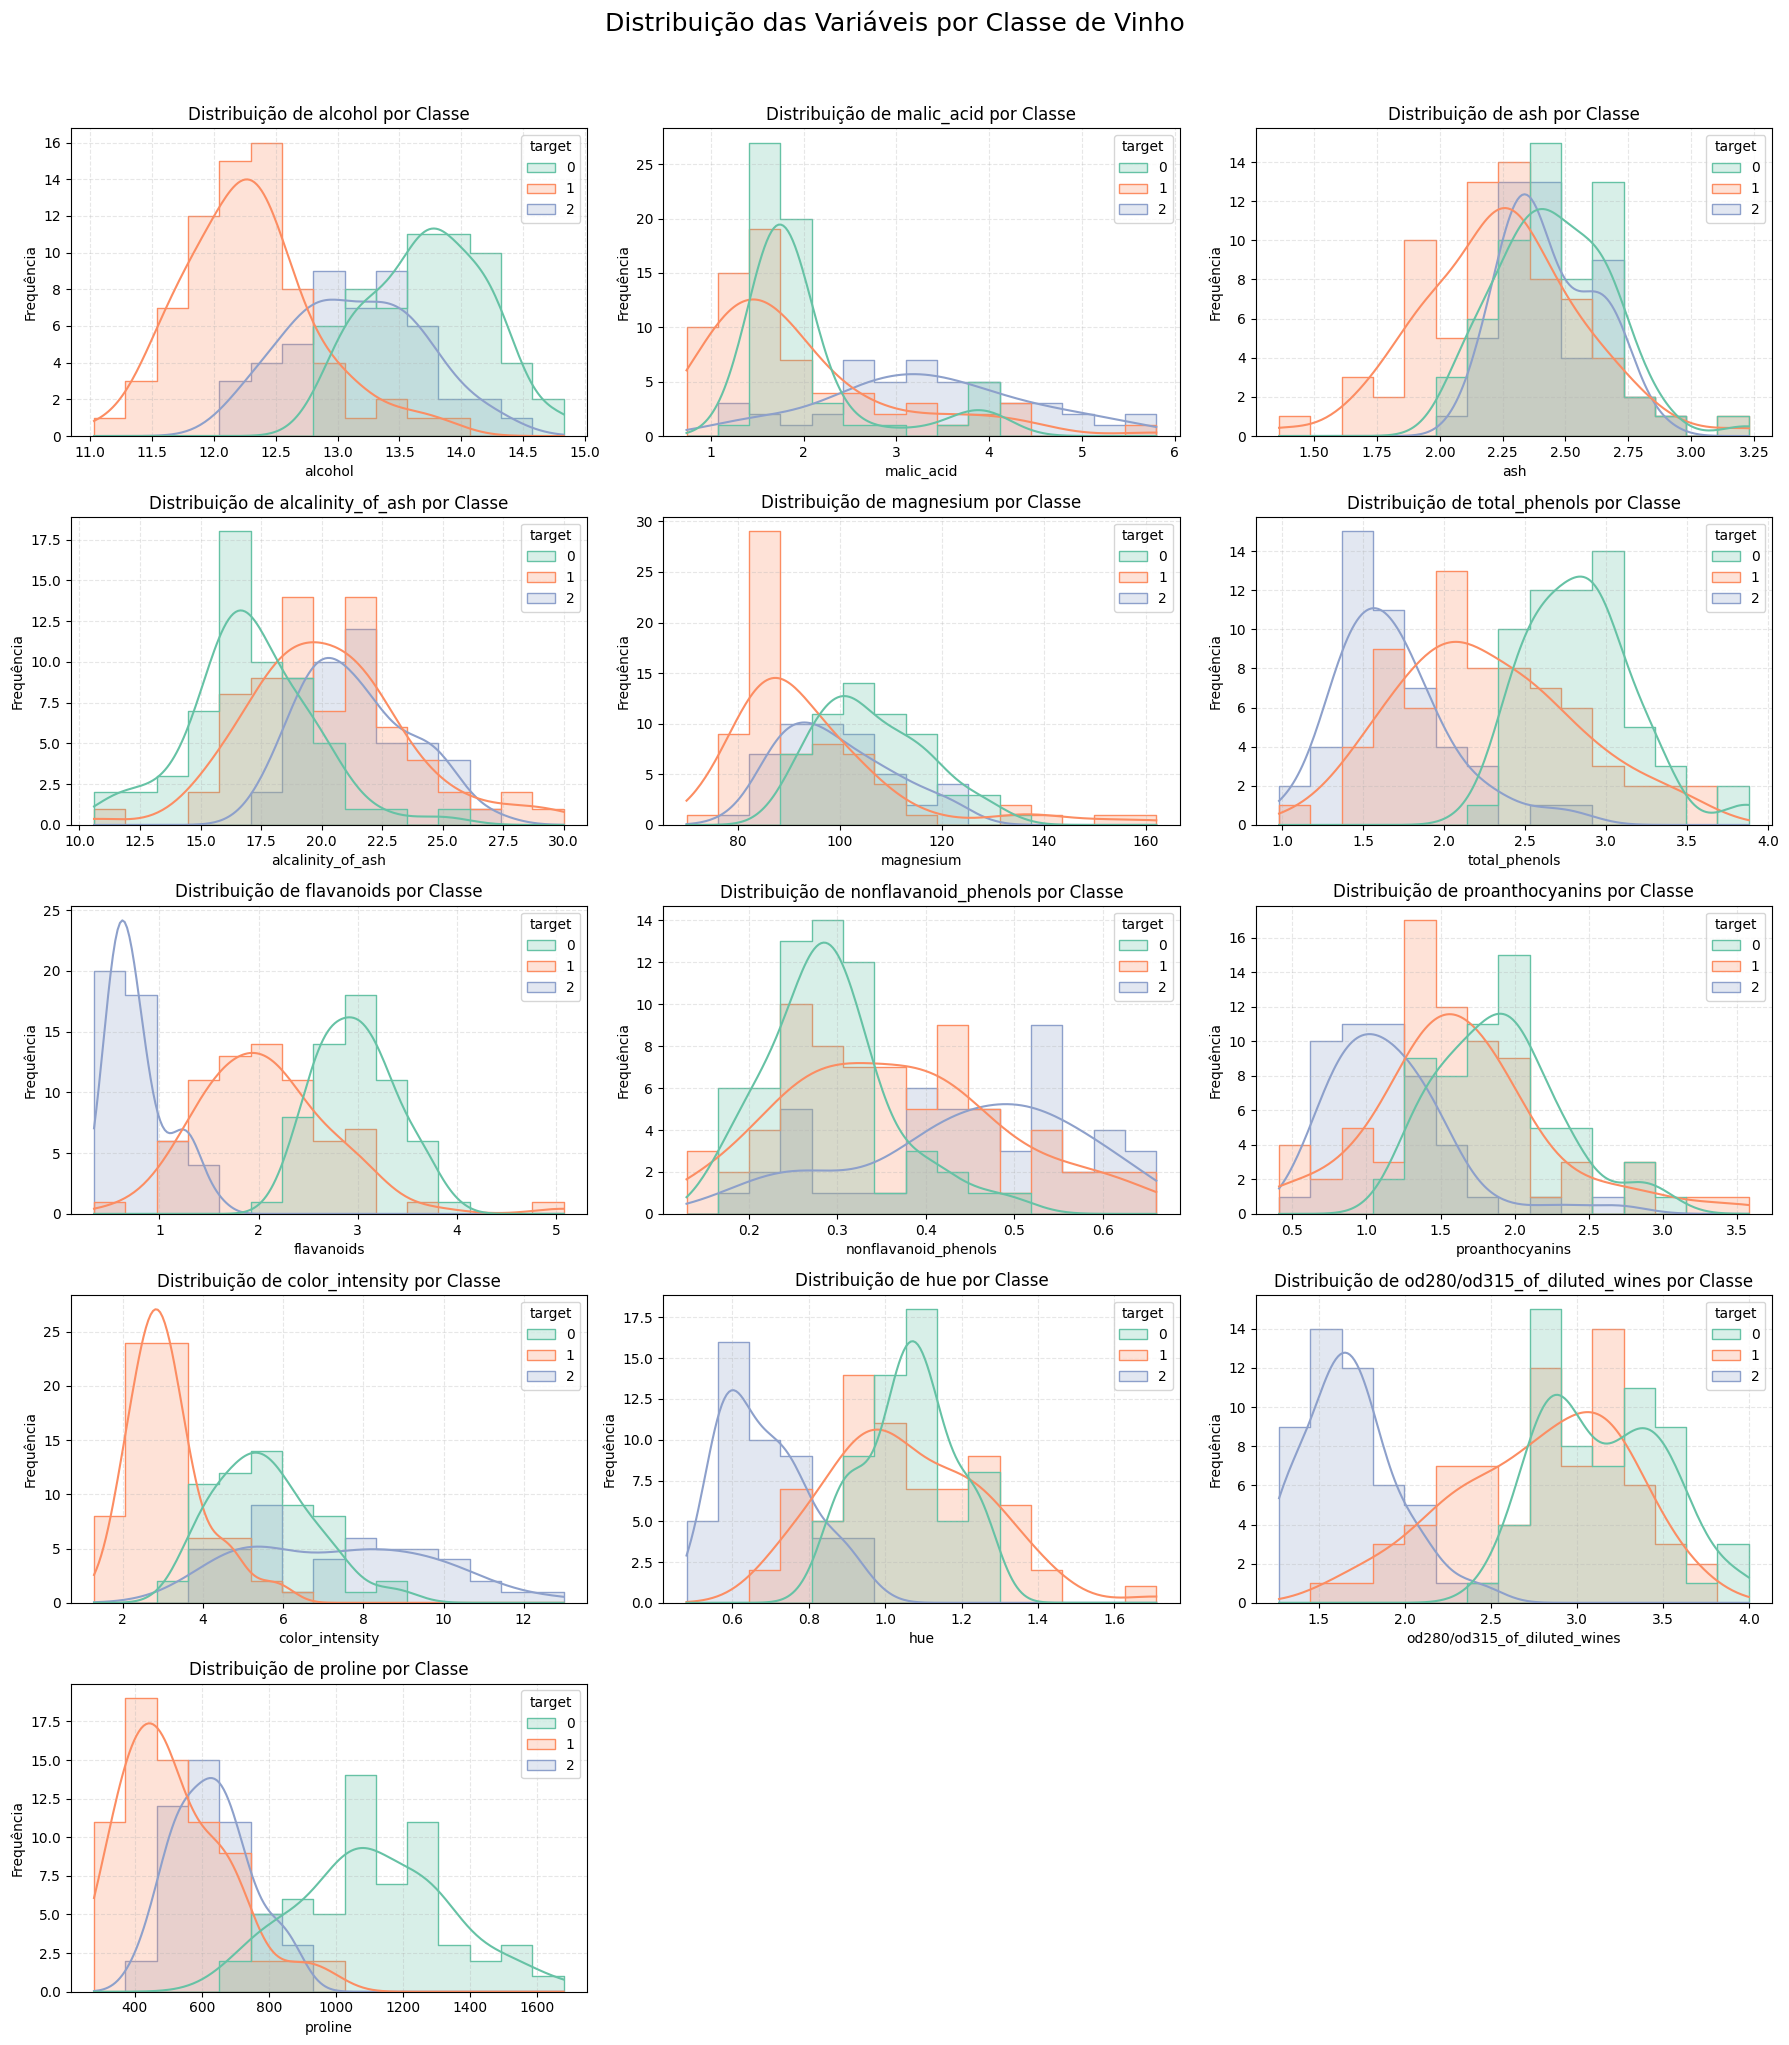

In [34]:
# Lista das variáveis numéricas (exceto o target)
variaveis = df.drop(columns='target').columns

plt.figure(figsize=(18, 20))

for i, col in enumerate(variaveis):
    plt.subplot(5, 3, i + 1)
    sns.histplot(data=df, x=col, hue='target', bins=15, kde=True, palette='Set2', element='step', common_norm=False)
    plt.title(f'Distribuição de {col} por Classe')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.suptitle('Distribuição das Variáveis por Classe de Vinho', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

##Matriz de Correlação

A matriz de correlação exibe o grau de associação linear entre os atributos químicos dos vinhos. Valores próximos de +1 indicam forte correlação positiva; próximos de -1 indicam correlação negativa; e próximos de 0 indicam fraca ou nenhuma correlação linear.

Destaques:

- flavanoids e od280/od315_of_diluted_wines apresentam correlação forte positiva (~0.79).
- alcalinity_of_ash tem correlação negativa com magnesium e flavanoids.
- color_intensity apresenta correlações fracas com outras variáveis, indicando comportamento mais independente.

Essa análise é útil tanto para *entendimento do dataset* quanto para *seleção de variáveis* nos modelos de machine learning.

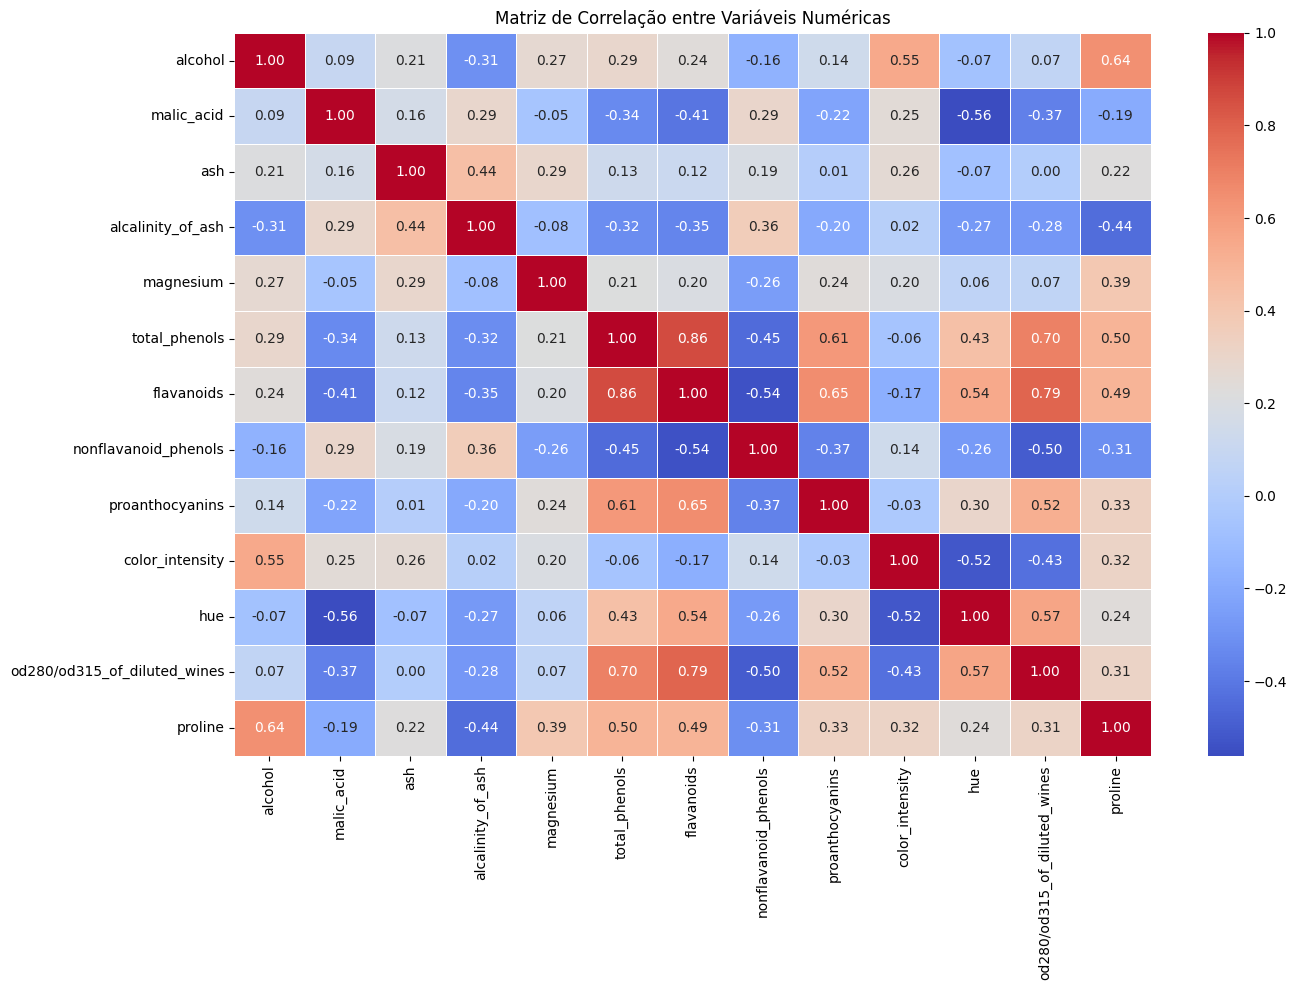

In [35]:
# Cálculo da correlação
corr = df.drop(columns='target').corr()

# Plotagem
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

##Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separando X (variáveis independentes) e y (alvo)
X = df.drop('target', axis=1)
y = df['target']

# 2. Padronização das variáveis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Divisão em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Exibindo as formas das matrizes
print("Treino:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)

Treino: (124, 13) (124,)
Teste: (54, 13) (54,)


##Normalização

Optamos por aplicar a técnica de *normalização (Min-Max Scaling)*, que transforma todos os valores para o intervalo entre 0 e 1. Isso evita que variáveis com maiores magnitudes dominem o modelo e melhora o desempenho de algoritmos baseados em distância, como KNN.

A fórmula aplicada é:  
*x_norm = (x - min) / (max - min)*

In [17]:
from sklearn.preprocessing import MinMaxScaler

# 1. Separando X e y
X = df.drop('target', axis=1)
y = df['target']

# 2. Aplicando normalização
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 3. Dividindo em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)

# Checando resultado
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (124, 13)
Teste: (54, 13)


Com os dados normalizados e prontos, podemos seguir para a modelagem. A normalização garante que todas as variáveis contribuam igualmente no treinamento, especialmente em algoritmos sensíveis à escala.

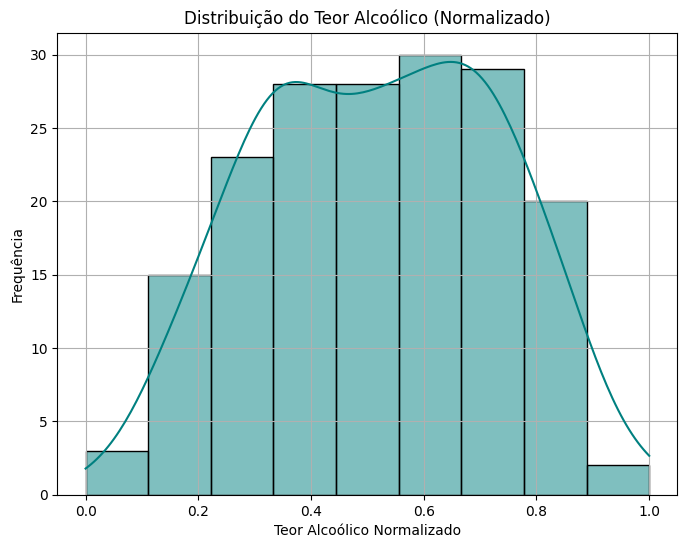

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset normalizado como DataFrame
df_normalized = pd.DataFrame(X_normalized, columns=df.columns[:-1])

# Visualização
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['alcohol'], kde=True, color='teal')
plt.title('Distribuição do Teor Alcoólico (Normalizado)')
plt.xlabel('Teor Alcoólico Normalizado')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Visualizamos a distribuição da variável alcohol após a normalização com Min-Max Scaling. O gráfico mostra que os valores foram reescalados para o intervalo entre 0 e 1, preservando a forma original da distribuição da variável

##Patronização

A variável alcohol foi padronizada usando Z-score (StandardScaler), o que transforma a distribuição para ter média 0 e desvio padrão 1.

A forma da distribuição permanece similar à original, mas os valores agora estão centrados em torno de 0, facilitando a comparação entre diferentes variáveis com escalas distintas.

In [19]:
from sklearn.preprocessing import StandardScaler

# Separando X (sem a coluna 'target')
X = df.drop('target', axis=1)

# Aplicando a padronização
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Criando um DataFrame com os dados padronizados
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)

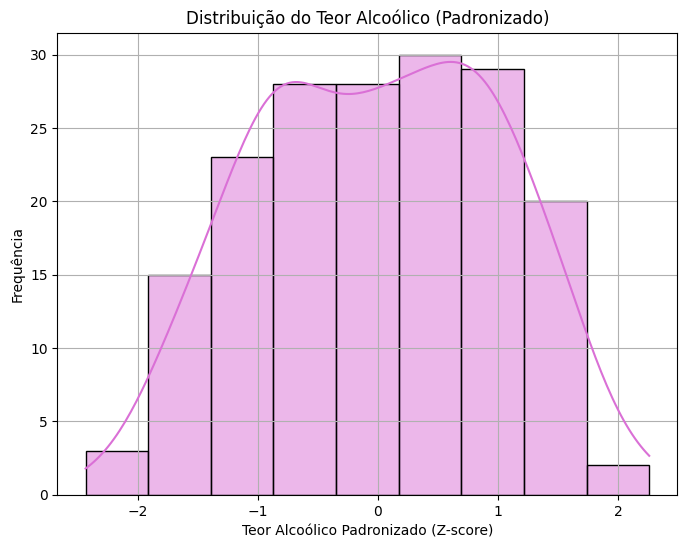

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['alcohol'], kde=True, color='orchid')
plt.title('Distribuição do Teor Alcoólico (Padronizado)')
plt.xlabel('Teor Alcoólico Padronizado (Z-score)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Visualizamos a distribuição das variáveis após a padronização com StandardScaler. A padronização transforma os dados para terem média 0 e desvio padrão 1, sem alterar a forma da distribuição.

É possível observar que, embora os dados estejam centrados em 0, a forma das distribuições originais das variáveis foi preservada.

#Tratamento de Valores Nulos

Nesta etapa, verificamos se o dataset contém valores ausentes (nulos), o que poderia comprometer a análise ou a performance dos modelos.

Utilizamos o método isnull().sum() para checar quantos valores nulos existem em cada coluna.

No caso do dataset Wine, *nenhum valor nulo foi encontrado*, ou seja, os dados estão completos e não exigem imputação ou remoção de registros.

In [21]:
# Verificando valores nulos
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


## Importação das Bibliotecas e Carregamento dos Dados

Nesta etapa, importamos as bibliotecas necessárias para análise, visualização, transformação dos dados e construção dos modelos. Em seguida, carregamos o dataset Wine diretamente do scikit-learn.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore

# Carregar o dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

##Remoção de Outliers com Z-Score

Removemos outliers com o método do z-score, que elimina valores muito distantes da média. Isso ajuda a evitar que valores extremos distorçam a análise e os modelos.

In [39]:
# Cálculo do z-score
z_scores = np.abs(zscore(df.drop(columns='target')))

# Filtrando linhas com todos os z-scores < 3
df_sem_outliers = df[(z_scores < 3).all(axis=1)]

print(f'Dados antes: {df.shape[0]} linhas')
print(f'Dados depois da remoção de outliers: {df_sem_outliers.shape[0]} linhas')

Dados antes: 178 linhas
Dados depois da remoção de outliers: 168 linhas


##Padronização dos Dados

Aqui, usamos o StandardScaler para padronizar os dados — transformando cada variável para ter média 0 e desvio padrão 1. Essa etapa é essencial antes de aplicar algoritmos que dependem de distância entre os pontos.

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sem_outliers.drop(columns='target'))

## Redução de Dimensionalidade com PCA

Aplicamos PCA (Principal Component Analysis) para reduzir as 13 variáveis originais a 2 componentes principais, permitindo visualizar a distribuição dos dados em um plano bidimensional.

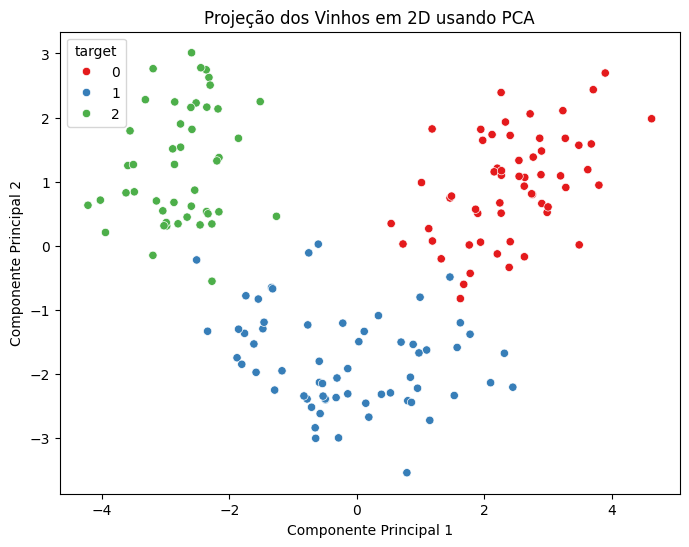

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_sem_outliers['target'], palette='Set1')
plt.title('Projeção dos Vinhos em 2D usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

##Visualização dos Grupos após PCA

Com os dados reduzidos para 2 dimensões, criamos um gráfico de dispersão colorido por classe, facilitando a visualização da separação entre os tipos de vinho.

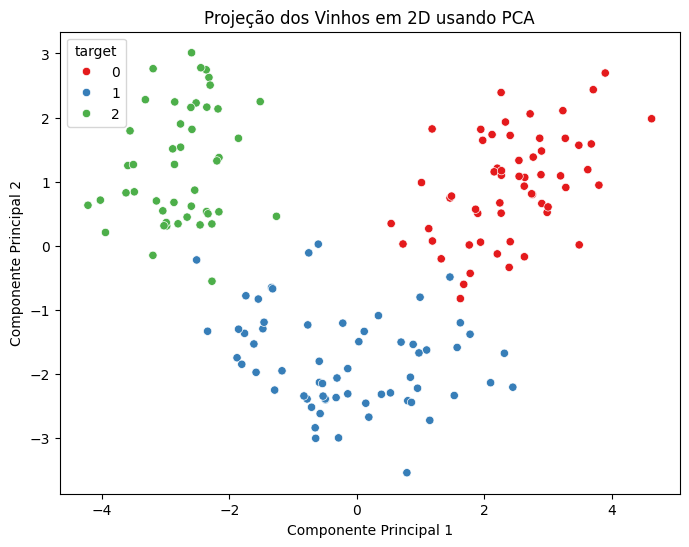

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_sem_outliers['target'], palette='Set1')
plt.title('Projeção dos Vinhos em 2D usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

##Avaliação da Importância das Variáveis com Random Forest

Utilizamos um modelo de Random Forest para identificar as variáveis mais importantes para a classificação. Essa análise ajuda a entender quais atributos químicos têm maior impacto na diferenciação dos vinhos.

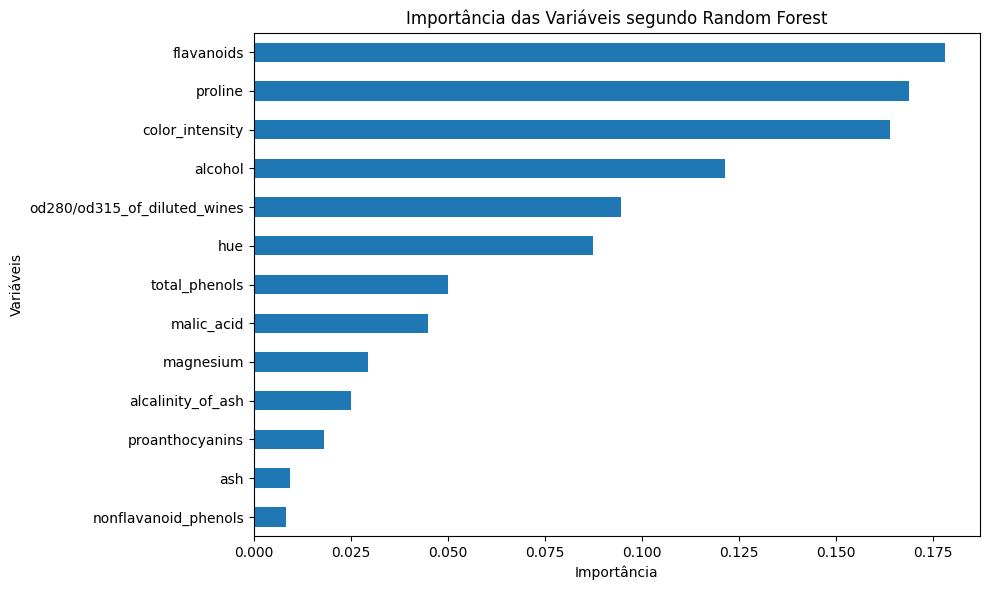

In [43]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, df_sem_outliers['target'])

# Coletar e ordenar importâncias
importances = pd.Series(rf.feature_importances_, index=wine.feature_names)
importances = importances.sort_values(ascending=True)

# Gráfico da importância
plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title('Importância das Variáveis segundo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

##Conclusão

A partir da análise exploratória realizada com o conjunto de dados Wine, foi possível investigar e confirmar as hipóteses propostas:
	##Perfis químicos distintos entre as classes:
Os histogramas segmentados por classe evidenciaram que os vinhos pertencentes a diferentes categorias possuem perfis químicos bem distintos. Variáveis como teor alcoólico, concentração de fenóis e flavanoides apresentaram distribuições significativamente diferentes entre os grupos, o que confirma que essas características químicas são úteis para distinguir os tipos de vinho.
	##Variáveis com maior poder discriminativo:
A análise estatística e a matriz de correlação indicaram que algumas variáveis têm, de fato, maior poder discriminativo do que outras. Variáveis como flavanoids, color_intensity, alcohol e proline demonstraram forte separação entre as classes, reforçando sua relevância na construção de modelos de classificação.
	##Redução de dimensionalidade com PCA:
A aplicação do PCA (Análise de Componentes Principais) mostrou-se eficaz para reduzir a dimensionalidade do conjunto de dados e visualizar a separação entre os grupos de vinho em duas dimensões. O gráfico resultante evidenciou que as três classes de vinho ocupam regiões distintas no espaço projetado, validando a hipótese de que o PCA pode ser uma ferramenta útil para representação e análise visual dos dados.